In [1]:
import pandas as pd
import numpy as np
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp
import numpy as np


In [2]:
import pandas as pd

# Number of customers
num_customers = 11

# Randomly generate distances (you can replace this with your own distances)
distances = [[0, 10, 20, 15, 25, 30, 5, 12, 8, 18, 22],    # Depot to all customers
             [10, 0, 8, 14, 7, 22, 17, 5, 25, 13, 16],     # Customer 1 to all
             [20, 8, 0, 18, 10, 15, 30, 12, 20, 28, 14],   # Customer 2 to all
             [15, 14, 18, 0, 25, 13, 10, 20, 8, 7, 19],    # Customer 3 to all
             [25, 7, 10, 25, 0, 8, 12, 15, 30, 18, 24],    # Customer 4 to all
             [30, 22, 15, 13, 8, 0, 18, 7, 14, 10, 23],   # Customer 5 to all
             [5, 17, 30, 10, 12, 18, 0, 22, 25, 20, 9],   # Customer 6 to all
             [12, 5, 12, 20, 15, 7, 22, 0, 8, 13, 17],    # Customer 7 to all
             [8, 25, 20, 8, 30, 14, 25, 8, 0, 10, 21],    # Customer 8 to all
             [18, 13, 28, 7, 18, 10, 20, 13, 10, 0, 11],  # Customer 9 to all
             [22, 16, 14, 19, 24, 23, 9, 17, 21, 11, 0]]  # Customer 10 to all

# Create a DataFrame from the distances matrix
df = pd.DataFrame(distances, columns=["Depot"]+[f"Customer {i}" for i in range(1,num_customers)],
                  index=["Depot"]+[f"Customer {i}" for i in range(1,num_customers)])
df


,Depot,Customer 1,Customer 2,Customer 3,Customer 4,Customer 5,Customer 6,Customer 7,Customer 8,Customer 9,Customer 10
Depot,0,10,20,15,25,30,5,12,8,18,22
Customer 1,10,0,8,14,7,22,17,5,25,13,16
Customer 2,20,8,0,18,10,15,30,12,20,28,14
Customer 3,15,14,18,0,25,13,10,20,8,7,19
Customer 4,25,7,10,25,0,8,12,15,30,18,24
Customer 5,30,22,15,13,8,0,18,7,14,10,23
Customer 6,5,17,30,10,12,18,0,22,25,20,9
Customer 7,12,5,12,20,15,7,22,0,8,13,17
Customer 8,8,25,20,8,30,14,25,8,0,10,21
Customer 9,18,13,28,7,18,10,20,13,10,0,11


In [3]:
df.iloc[0,1]

10

In [4]:
data = {
    'Node': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X': [4.01115012, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 3.74, 7.08072578,
       0.20584494],

    'Y': [8.8245828, 16.64885282,  4.24678221,  3.63649934,  3.6680902 ,
        6.08484486, 10.49512863,  8.63890037,  19.398 , 12.23705789,
        2.78987721],

    'Delivery quantity': [0, 20, 30, 10, 40, 20, 20, 20, 10, 20, 30],
    'Pickup quantity': [0, 10, 32, 12, 35, 29, 11, 28, 14, 15, 40],
    'Earliest start time': [0, 67, 32, 101, 71, 40, 55, 69, 56, 51, 90],
    'Latest arrival time': [240, 191, 97, 146, 193, 113, 164, 118, 155, 160, 177],
    'Service time': [0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
}

df1 = pd.DataFrame(data)
df1


,Node,X,Y,Delivery quantity,Pickup quantity,Earliest start time,Latest arrival time,Service time
0,0,4.011150,8.824583,0,0,0,240,0
1,1,9.507143,16.648853,20,10,67,191,10
2,2,7.319939,4.246782,30,32,32,97,10
3,3,5.986585,3.636499,10,12,101,146,10
4,4,1.560186,3.668090,40,35,71,193,10
5,5,1.559945,6.084845,20,29,40,113,10
6,6,0.580836,10.495129,20,11,55,164,10
7,7,8.661761,8.638900,20,28,69,118,10
8,8,3.740000,19.398000,10,14,56,155,10
9,9,7.080726,12.237058,20,15,51,160,10


In [5]:
Demand=df1["Delivery quantity"].tolist()
Pickup=df1["Pickup quantity"].tolist()
Ai=df1['Earliest start time'].tolist()
Bi=df1['Latest arrival time'].tolist()

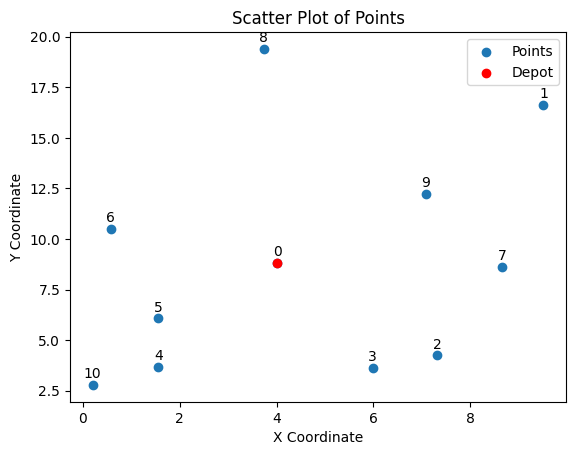

In [6]:
import matplotlib.pyplot as plt
x_coordinates=df1["X"].tolist()
y_coordinates=df1["Y"].tolist()


# Create a scatter plot
plt.scatter(x_coordinates, y_coordinates, label='Points')
plt.scatter(x_coordinates[0], y_coordinates[0],
            color='red', label='Depot')

# Label the axes
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
for i, txt in enumerate(range(0, len(x_coordinates))):
    plt.annotate(txt, (x_coordinates[i], y_coordinates[i]), textcoords="offset points", xytext=(0, 5), ha='center')



# Add a title to the plot
plt.title('Scatter Plot of Points')

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [7]:
!pip -q install pyomo
from pyomo.environ import *


In [8]:
data = {
    'Vehicle': ['vehicle A', 'vehicle B', 'vehicle C', 'vehicle D', 'vehicle E', 'Vehicle F'],
    'RentingCostPerDay': [67, 100, 80, 90, 75, 85],'Earliest arrival time':[0,0,0,0,0,0],'LAtest arrival time':[10,10,10,10,10,10],'Capacity':[200,200,200,200,200,200]
}

# Create a DataFrame
df3 = pd.DataFrame(data)
df3


,Vehicle,RentingCostPerDay,Earliest arrival time,LAtest arrival time,Capacity
0,vehicle A,67,0,10,200
1,vehicle B,100,0,10,200
2,vehicle C,80,0,10,200
3,vehicle D,90,0,10,200
4,vehicle E,75,0,10,200
5,Vehicle F,85,0,10,200


In [9]:
A0=df3['Earliest arrival time'].tolist()
B0=df3['LAtest arrival time'].tolist()
Ck=df3['Capacity'].tolist()
lk=[0]*6
C_k=[max(Ck)]*11
l_k=[0]*11

In [10]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Number of nodes
num_nodes = 11

# Generate a random matrix for traveling times
travel_times = np.random.randint(1, 28, size=(num_nodes, num_nodes))

# Ensure diagonal elements are zero (travel time from a node to itself)
np.fill_diagonal(travel_times, 0)

# Create a DataFrame
df4 = pd.DataFrame(travel_times, index=range(0, num_nodes), columns=range(0, num_nodes))

# Display the DataFrame
df4


,0,1,2,3,4,5,6,7,8,9,10
0,0,20,15,11,8,21,7,26,19,23,11
1,11,0,21,4,8,24,3,22,21,2,24
2,12,6,0,21,1,12,26,22,12,25,17
3,27,27,10,0,15,15,19,12,23,20,25
4,3,5,19,7,0,9,7,18,4,25,14
5,18,26,9,26,21,0,20,15,7,12,8
6,15,3,14,17,4,18,0,4,2,6,22
7,10,4,22,18,26,12,2,0,4,14,16
8,15,8,14,23,25,8,21,16,0,18,15
9,21,24,26,25,13,9,15,13,1,0,7


In [11]:
fixed_k=df3["RentingCostPerDay"].tolist()
fixed_k

[67, 100, 80, 90, 75, 85]

In [12]:
Model=ConcreteModel()
alpha=0.5 # represent the tradeoff between dispatching cost and travelling cost
Z=1000
M=11
N=6
row_indicies = np.arange(M)
col_indicies = np.arange(N)
Model.x = Var(row_indicies, row_indicies, domain= Binary) # xi,j =1 if i->j path is taken in our route 0 otherwise
Model.di_j = Var(row_indicies, col_indicies, domain= Binary) # di,j=1 if jth vehicle is used for ith customer 0 otherwise
Model.k = Var(col_indicies, domain= Binary) # ki =1 if ith vehicle is used in our formulation 0 otherwise

# load of vehicle when it starts from depot
Model.l0_k = Var(col_indicies,domain=NonNegativeReals)
# strating time of vehicle k when it starts from depot
Model.s0_k = Var(col_indicies,domain=NonNegativeIntegers)
# load on the vehicle after completing the journey upto customer i
Model.l_i = Var(row_indicies,domain=NonNegativeReals)
Model.li_k = Var(row_indicies,col_indicies,domain=NonNegativeReals)
# total cost covered by the vehicle utpo customer i
Model.d_i = Var(row_indicies,domain=NonNegativeReals)
#  time of vehicle k when it visits upto customer i
Model.si = Var(row_indicies,domain=NonNegativeIntegers)
# defining the decision variables
Model.Objective = Objective(expr = sum(0.5*df.iloc[i,j]*Model.x[i,j] for i in row_indicies for j in col_indicies)+sum(0.5*Model.k[i]*fixed_k[i] for i in col_indicies), sense = minimize)
[Model.s0_k[i].setub(B0[i]) for i in col_indicies]
[Model.s0_k[i].setlb(A0[i]) for i in col_indicies]
[Model.si[i].setub(Bi[i]) for i in row_indicies]
[Model.si[i].setlb(Ai[i]) for i in row_indicies]
[Model.l0_k[k].setub(Ck[k]) for k in col_indicies]
[Model.l0_k[k].setlb(lk[k]) for k in col_indicies]
[Model.l_i[k].setub(C_k[k]) for k in row_indicies]
[Model.l_i[k].setlb(l_k[k]) for k in row_indicies]

# defining our constraints
# defining our constraints
Model.constraints = ConstraintList()
#1. Each customer should be allocated to only a single vehicle.

for i in row_indicies:
  [Model.constraints.add(expr=sum(Model.di_j[i,j] for j in col_indicies)==1)]
#2. A customer can be allocated to a vehicle only when the corresponding vehicle is used in the final solution



# definig our constraints
for i in row_indicies:
  [Model.constraints.add(expr=sum(Model.di_j[i,j] for j in col_indicies)==1)]
[Model.constraints.add(expr = Model.di_j[i,j] <= Model.k[j]) for i in row_indicies for j in col_indicies]
for k in col_indicies:
  [Model.constraints.add(expr = Model.di_j[i,k]-Model.di_j[j,k]<=(1-Model.x[i,j]))for i in row_indicies for j in row_indicies]
for i in row_indicies:
  [Model.constraints.add(expr=sum(Model.x[i,j] for j in row_indicies)==1)]
for j in row_indicies:
  [Model.constraints.add(expr=sum(Model.x[i,j] for i in row_indicies)==1)]
[Model.constraints.add(expr=Model.x[i,i]==0) for i in row_indicies]
[Model.constraints.add(expr = Model.x[i,j]+Model.x[j,i]<=1)for i in row_indicies for j in row_indicies]
#[Model.constraints.add(expr=Model.d_i[j]>=Model.d_i[i]+df.iloc[i,j]-Z*(1-Model.x[i,j])) for i in row_indicies for j in row_indicies]
for k in col_indicies:
  [Model.constraints.add(expr=Model.si[i]>=Model.s0_k[k]+df4.iloc[0,i]) for i in row_indicies]
#[Model.constraints.add(expr=Model.si[j]>=Model.si[i]+df4.iloc[i,j]-Z*(1-Model.x[i,j])) for i in row_indicies for j in row_indicies]
for k in col_indicies:
  [Model.constraints.add(expr=sum(Model.di_j[i,k]*Demand[i] for i in row_indicies) == Model.l0_k[k])]

for k in col_indicies:
  [Model.constraints.add(expr=Model.l_i[i]>=Model.l0_k[k]-Demand[i]+Pickup[i]) for i in row_indicies]
#[Model.constraints.add(expr=Model.l_i[j]>=Model.l_i[i]-Demand[i]+Pickup[i]-Z*(1-Model.x[i,j])) for i row_indicies for j in row_indicies]
[Model.constraints.add(expr = Model.di_j[i,j] <= Model.k[j]) for i in row_indicies for j in col_indicies]












In [13]:
# defining the objective
Model.Objective = Objective(expr = sum(0.5*df.iloc[i,j]*Model.x[i,j] for i in row_indicies for j in col_indicies)+sum(0.5*Model.k[i]*fixed_k[i] for i in col_indicies), sense = minimize)


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [14]:
!apt-get install -y -qq coinor-cbc

In [15]:
!apt-get install -y -qq glpk-utils



In [16]:
optCBC = SolverFactory('cbc')


In [17]:
results = optCBC.solve(Model)

In [18]:
print(results)


Problem: 
- Name: unknown
  Lower bound: 92.0
  Upper bound: 92.0
  Number of objectives: 1
  Number of constraints: 820
  Number of variables: 182
  Number of binary variables: 193
  Number of integer variables: 210
  Number of nonzeros: 66
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 9.8
  Wallclock time: 11.6
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 78
      Number of created subproblems: 78
    Black box: 
      Number of iterations: 19943
  Error rc: 0
  Time: 11.618776082992554
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [19]:
print(Model.Objective())

92.0


In [20]:
list1=[]

In [21]:
for i in row_indicies:
  for j in row_indicies:
    if Model.x[i,j].value==1:
      print(Model.x[i,j].value)
      list1.append((i,j))


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [22]:
list1 # list of all feasible rputes of of problem

[(0, 8),
 (1, 2),
 (2, 9),
 (3, 10),
 (4, 1),
 (5, 4),
 (6, 0),
 (7, 5),
 (8, 6),
 (9, 3),
 (10, 7)]

In [27]:
for k in col_indicies:
  print(Model.k[k].value)


1.0
0.0
0.0
0.0
1.0
0.0


In [31]:
for k in col_indicies:
  if Model.k[k].value==1:
    print(f"{k+1}th vehicle is used in routing plan")
  else:
    print(f"{k+1}th vehicle is not used in routing plan")

1th vehicle is used in routing plan
2th vehicle is not used in routing plan
3th vehicle is not used in routing plan
4th vehicle is not used in routing plan
5th vehicle is used in routing plan
6th vehicle is not used in routing plan


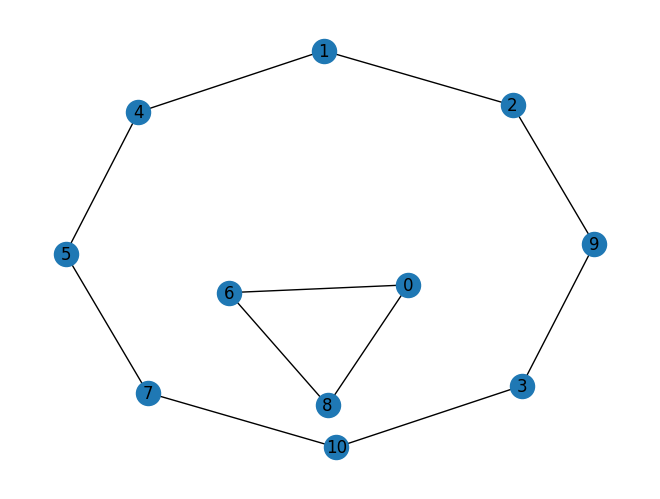

In [30]:
# visualization of feasible routes
import networkx as nx
N=[i for i in range(11)]
V=list1
G = nx.Graph()
G.add_nodes_from(N)
G.add_edges_from(V)
# for edges in directed graph tuple (i,j) implies i --> j

nx.draw_kamada_kawai(G, with_labels = True)


Here we can visualize that total of two subtours are framed for serving all the customers by a fleet of two vehicles selected from total availability of 6 vehicles in order to minimise travelling cost along with  renting cost of vehicles

In [35]:
# printing the selection of vehcile for a particular custoemr to serve its demand
for i in row_indicies:
  for j in col_indicies:
    if Model.di_j[i,j].value==1 and i!=0:
      print(f"{j+1}th vehicle is used for serving {i}th customer")





5th vehicle is used for serving 1th customer
5th vehicle is used for serving 2th customer
5th vehicle is used for serving 3th customer
5th vehicle is used for serving 4th customer
5th vehicle is used for serving 5th customer
1th vehicle is used for serving 6th customer
5th vehicle is used for serving 7th customer
1th vehicle is used for serving 8th customer
5th vehicle is used for serving 9th customer
5th vehicle is used for serving 10th customer


In [37]:
for i in row_indicies:
  if i!=0:
    print(f"The selected vehicle will serve the {i}th customer at {Model.si[i].value} Hrs")


The selected vehicle will serve the 1th customer at 191.0 Hrs
The selected vehicle will serve the 2th customer at 97.0 Hrs
The selected vehicle will serve the 3th customer at 146.0 Hrs
The selected vehicle will serve the 4th customer at 193.0 Hrs
The selected vehicle will serve the 5th customer at 113.0 Hrs
The selected vehicle will serve the 6th customer at 164.0 Hrs
The selected vehicle will serve the 7th customer at 118.0 Hrs
The selected vehicle will serve the 8th customer at 155.0 Hrs
The selected vehicle will serve the 9th customer at 160.0 Hrs
The selected vehicle will serve the 10th customer at 177.0 Hrs
